In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("spam.csv",encoding=('ISO-8859-1'),low_memory=False)

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#droping last three columns since less values
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [17]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [19]:
df.sample(3)

,target,text
4280,ham,"Wn u r hurt by d prsn who s close 2 u, do figh..."
3123,ham,My uncles in Atlanta. Wish you guys a great se...
363,ham,Busy here. Trying to finish for new year. I am...


In [20]:
#label encoding,ham=0;spam=1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
df['target']=encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
#removing duplicates
df.duplicated().sum()

403

In [25]:
df=df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

EDA

In [27]:
#number of spam and ham
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25eaa44a850>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

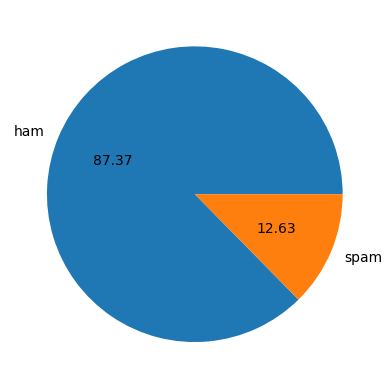

In [28]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#imbalanced data

In [29]:
#no of words ,characters

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
#finding number of characters in every email mssg
df['num_of_chars']=df['text'].apply(len)
df.head()

,target,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df.head()

,target,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
#number of words in tokenized form
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_of_chars,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_of_chars','num_of_words','num_of_sentences']].describe()

,num_of_chars,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#ham
df[df['target']==0][['num_of_chars','num_of_words','num_of_sentences']].describe()

,num_of_chars,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#ham
df[df['target']==1][['num_of_chars','num_of_words','num_of_sentences']].describe()

,num_of_chars,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_chars', ylabel='Count'>

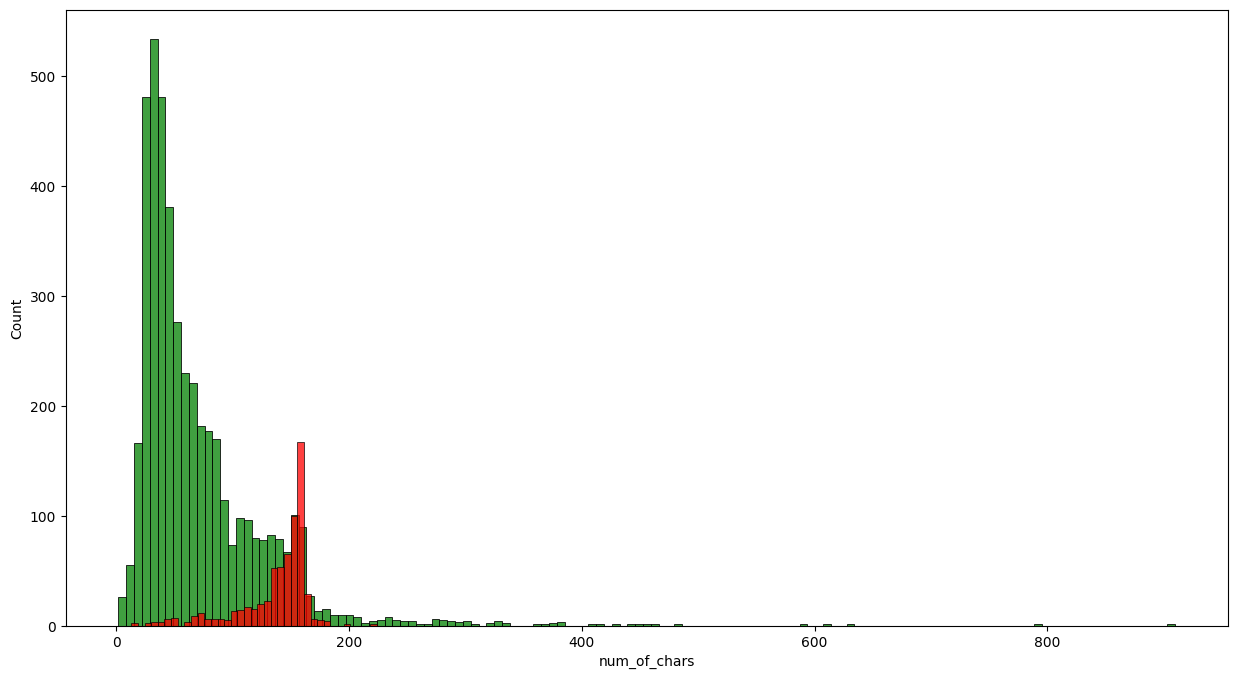

In [39]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['num_of_chars'],color='green')
sns.histplot(df[df['target']==1]['num_of_chars'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

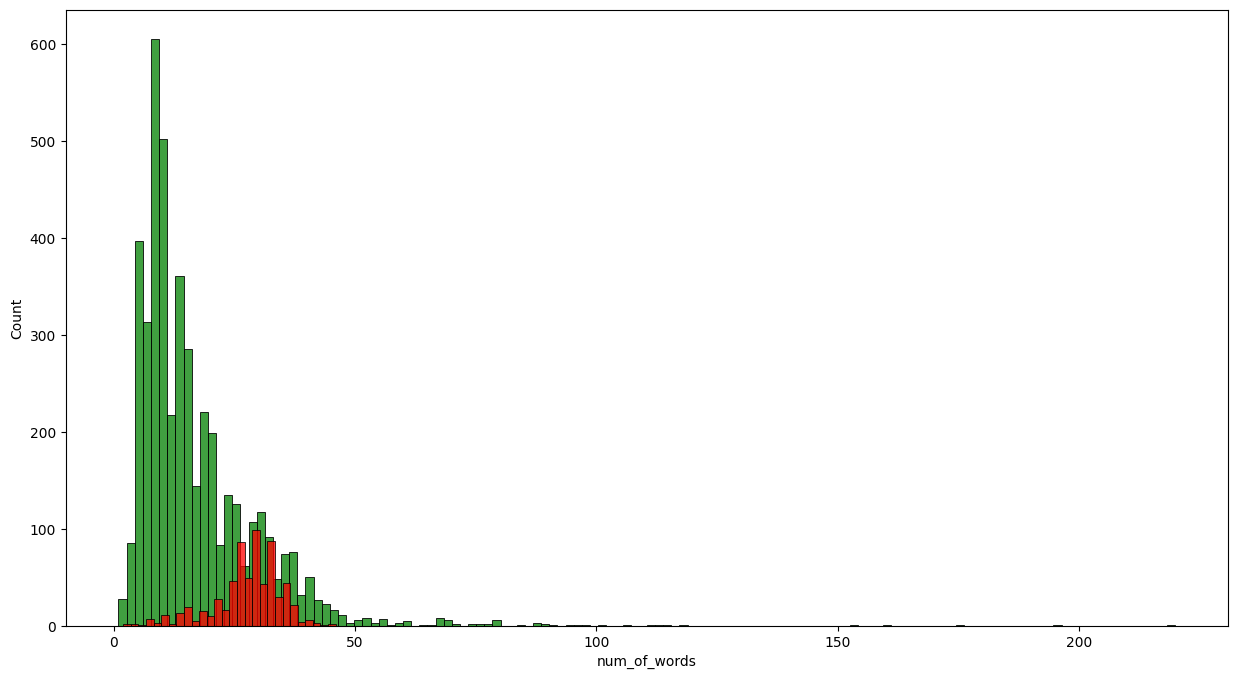

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['num_of_words'],color='green')
sns.histplot(df[df['target']==1]['num_of_words'],color='red')

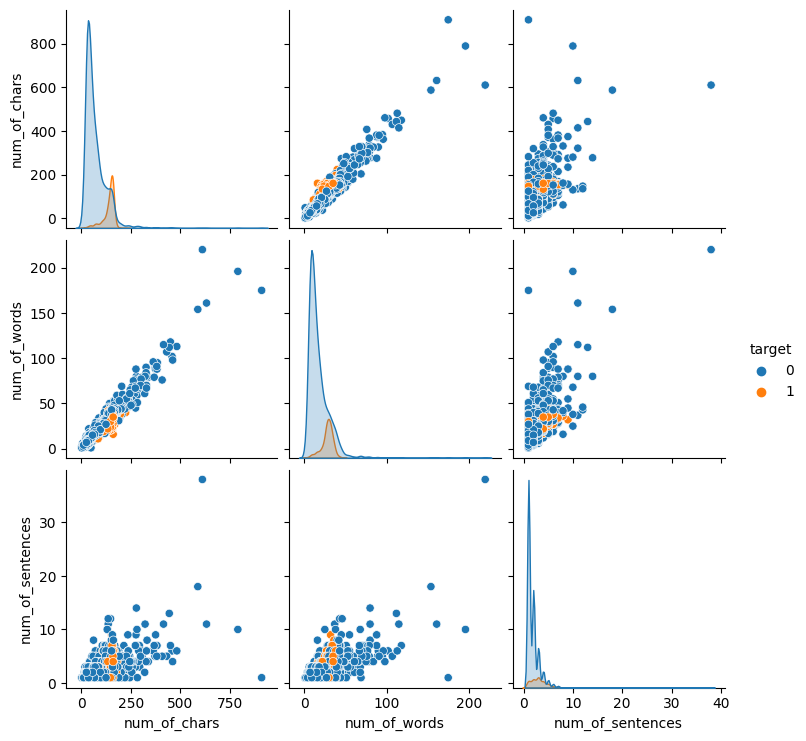

In [41]:
sns.pairplot(df,hue='target')

data preprocessing
lower case
tokenize
removing special characters
removing stop words and punctuations
stemming(dance->dancind,danced)

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('listening')

'listen'

*Lowercasing: The text is converted to lowercase.

*Tokenization: The text is split into individual words.

*Removing non-alphanumeric characters: Only words composed of letters and numbers are kept.

*Stopwords and punctuation removal: Common words that don't add much meaning and punctuation are removed.

*Stemming: The remaining words are reduced to their root forms using the Porter Stemmer.

*Joining words: Finally, the words are joined back into a single string with spaces.

This function will produce a cleaned and stemmed version of the input text

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text
    y = []
    
    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
            y.append(i)

    # Cloning the list and clearing the original list
    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Cloning the list again and applying stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
transform_text("hi How genetics. I rajashree aRe @ YOU?///")

'hi genet rajashre'

In [47]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_of_chars,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
#making word cloud of spam messages ,words mostly found in spam mssgs
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


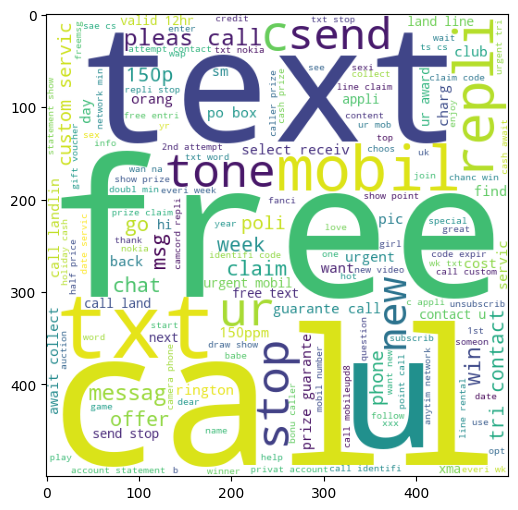

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

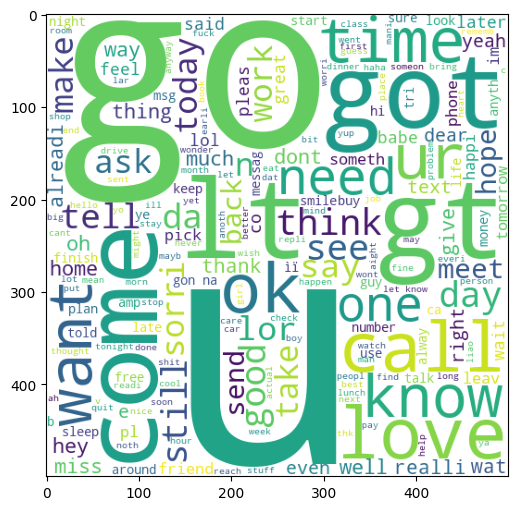

In [51]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [52]:
#top n words of ham and spam messgs by writing custom code
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [53]:
len(spam_corpus)

9939

In [54]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [55]:
len(ham_corpus)

35404

In [56]:
from collections import Counter
#sns.histplot(pd.DataFrame(Counter(spam_corpus).most_common(30)[0],pd.DataFrame(Counter(spam_corpus).most_common(30)[1])))
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<Axes: xlabel='word', ylabel='Count'>

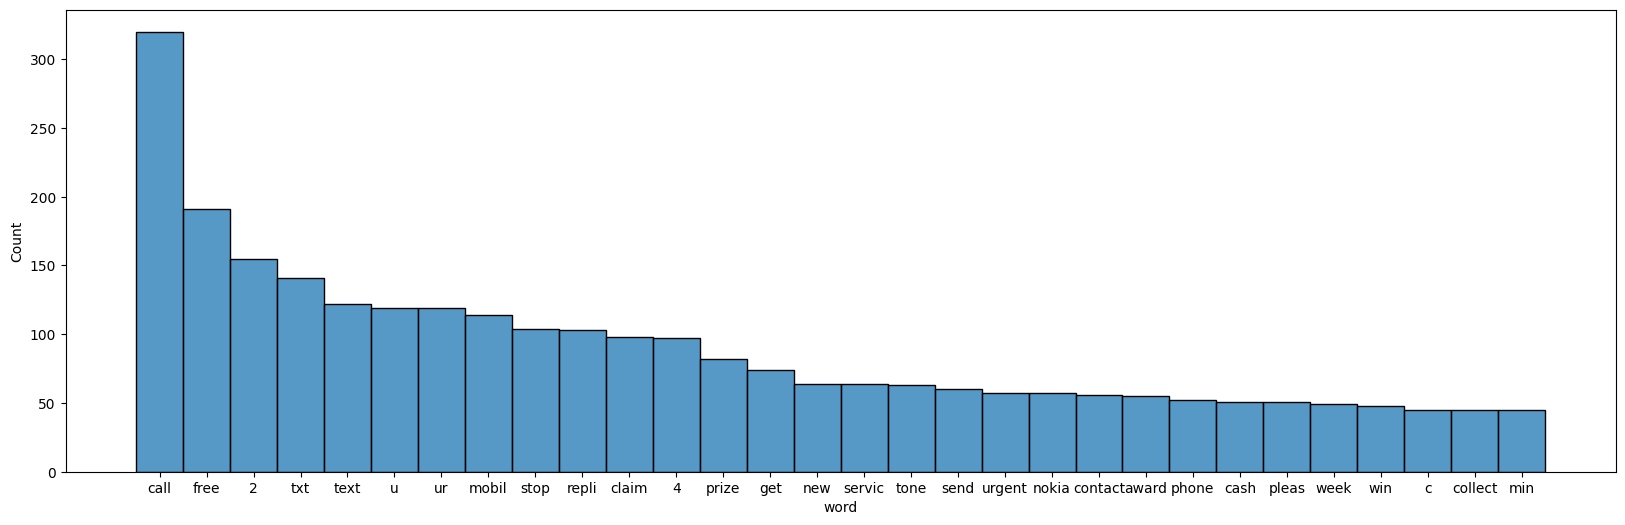

In [57]:

# Assuming 'df' is  DataFrame and 'transformed_text' contains preprocessed text
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Count the most common words
spam_word_counts = Counter(spam_corpus).most_common(30)

# Convert the counts to a DataFrame
spam_df = pd.DataFrame(spam_word_counts, columns=['word', 'count'])
plt.figure(figsize=(20,6))
# Plot the most common words in the spam corpus
sns.histplot(spam_df, x='word', weights='count', bins=30)


<Axes: xlabel='word', ylabel='Count'>

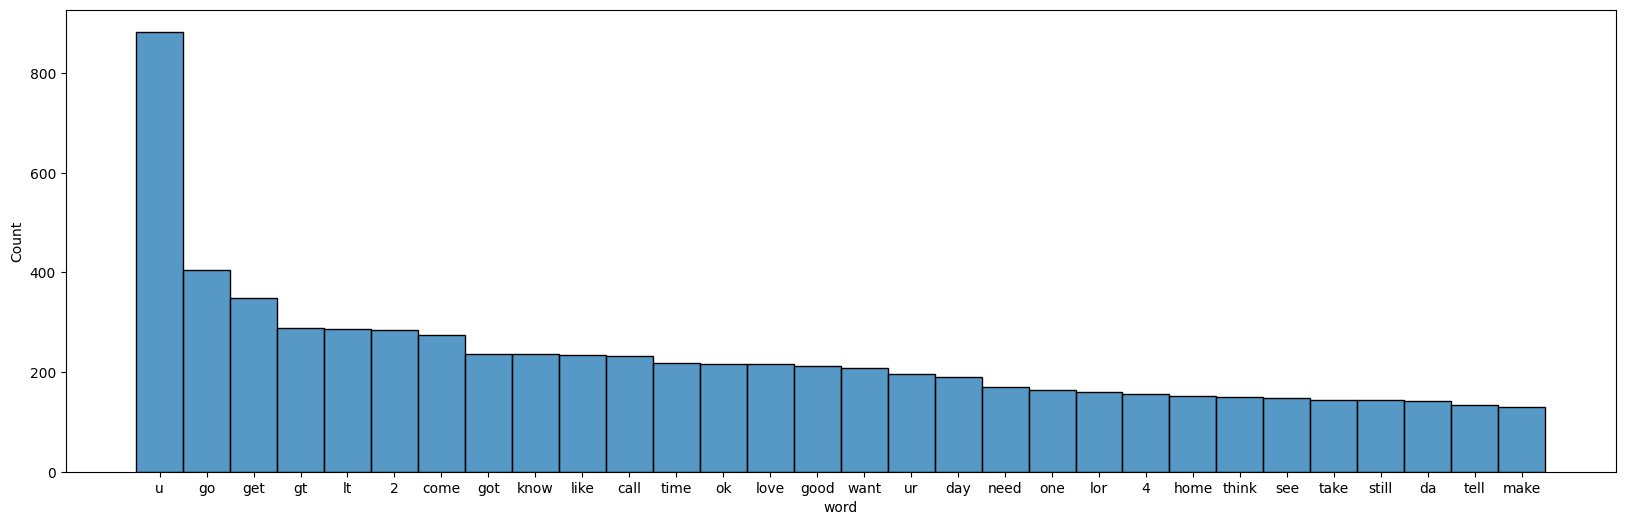

In [58]:
#for ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

ham_word_counts = Counter(ham_corpus).most_common(30)


ham_df = pd.DataFrame(ham_word_counts, columns=['word', 'count'])
plt.figure(figsize=(20,6))

sns.histplot(ham_df, x='word', weights='count', bins=30)


model building


In [59]:
#text vectorization
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x.shape

(5169, 6708)

In [61]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [63]:
#naive bayes

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train,y_train)
#evaluating performance
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
lrc=LogisticRegression(solver='liblinear',penalty='11')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
dtc=DecisionTreeClassifier(max_depth=5)

In [69]:
classifications={'SVC':svc,'KN':knc,'LR':lrc,'RF':rfc,'ETC':etc,'DT':dtc}

In [70]:
def train_classifier(classifications,x_train,y_train,x_test,y_test):
    classifications.fit(x_train,y_train)
    y_pred=classifications.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [78]:
#svm 
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [80]:
#knn
train_classifier(knc,x_train,y_train,x_test,y_test)

(0.9003868471953579, 1.0)

In [82]:
#random forest
train_classifier(rfc,x_train,y_train,x_test,y_test)

(0.971953578336557, 1.0)

In [83]:
#extra tree classifier
train_classifier(etc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9824561403508771)

In [85]:
#decidon tree
train_classifier(dtc,x_train,y_train,x_test,y_test)

(0.9352030947775629, 0.8380952380952381)

In [86]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [87]:
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
#print metric to get performance
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9468085106382979
